In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data=pd.read_csv('/content/agricultural_yield.csv')
data

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


In [4]:
X = data[['Soil_Quality','Seed_Variety'	,'Fertilizer_Amount_kg_per_hectare',	'Sunny_Days'	,'Rainfall_mm','Irrigation_Schedule'	,'Yield_kg_per_hectare'	]]
y = data['Yield_kg_per_hectare'].values

In [5]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
model=Sequential([
Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
Dense(32,activation='relu'),
Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [13]:
history=model.fit(X_train,y_train,epochs=500,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9763 - mae: 0.7311 - val_loss: 1.4183 - val_mae: 0.7886
Epoch 2/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8481 - mae: 0.6798 - val_loss: 1.3175 - val_mae: 0.7411
Epoch 3/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9782 - mae: 0.7397 - val_loss: 1.4834 - val_mae: 0.8077
Epoch 4/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8858 - mae: 0.7213 - val_loss: 1.3182 - val_mae: 0.7641
Epoch 5/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7524 - mae: 0.6281 - val_loss: 1.4804 - val_mae: 0.8052
Epoch 6/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7702 - mae: 0.6479 - val_loss: 1.1582 - val_mae: 0.6690
Epoch 7/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9008 - mae: 0.7125 - val_loss: 1.9333 - val_mae: 1.0281
Epoch 8/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8080 - mae: 0.6854 - val_loss: 1.4225 - val_mae: 0.8004
Epoch 9/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.691

In [14]:
test_loss,test_mae=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolute Error: {test_mae:2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1938 - mae: 0.2180 
Test Mean Absolute Error: 0.215076


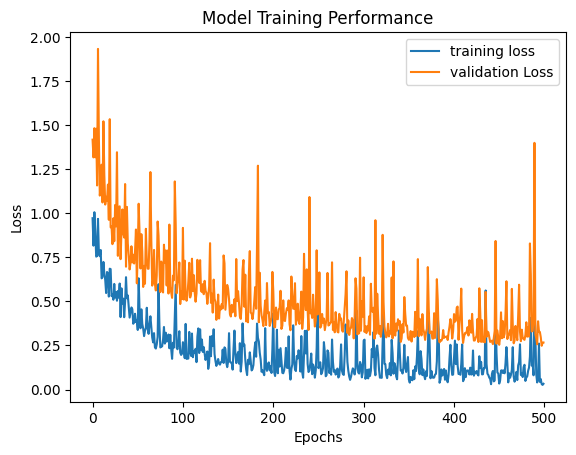

In [17]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()


<ipython-input-23-bd590bc42172>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-23-bd590bc42172>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


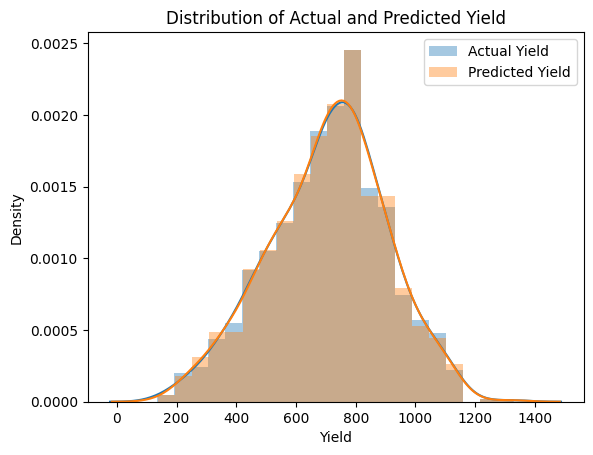

In [23]:
import seaborn as sns

sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [24]:
predictions=model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[ 422.41058],
       [ 588.7043 ],
       [1119.0784 ],
       [ 589.339  ],
       [ 764.0282 ],
       [1013.17163],
       [ 231.45728],
       [ 677.84106],
       [ 390.64108],
       [ 693.88885],
       [ 657.04004],
       [ 691.17896],
       [ 681.7344 ],
       [ 741.449  ],
       [ 805.454  ],
       [ 668.7066 ],
       [ 930.4318 ],
       [ 454.42303],
       [ 615.89026],
       [ 366.84735],
       [ 860.7269 ],
       [ 801.7131 ],
       [ 416.82812],
       [ 792.3867 ],
       [ 925.2472 ],
       [ 556.97205],
       [ 654.3273 ],
       [ 930.3302 ],
       [ 648.6925 ],
       [ 546.9957 ],
       [ 778.1937 ],
       [ 801.3858 ],
       [ 782.1839 ],
       [ 668.21796],
       [ 445.09644],
       [ 787.93097],
       [ 773.2589 ],
       [ 969.0577 ],
       [ 214.39375],
       [ 694.0615 ],
       [ 867.3307 ],
       [ 930.71985],
       [ 854.30414],
       [ 770.8048 ],
       [ 553.93713],
       [ 854.5312 ],
       [ 532.52924],
       [ 593.

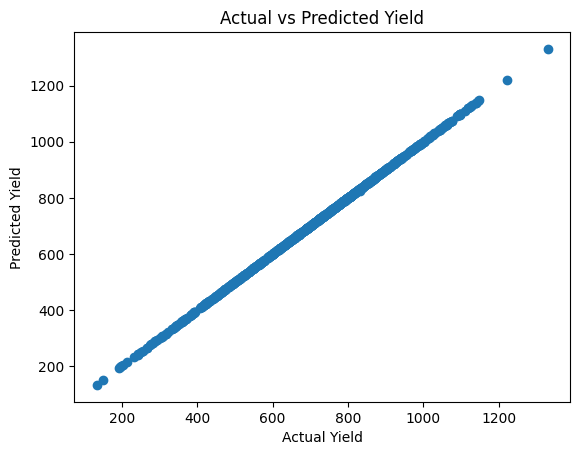

In [25]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()